In [2]:
# Projects in Finance

In [30]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol for Google
ticker = "GOOGL"

# Get data for the last 5 years
data = yf.download(ticker, start="2019-01-01", end="2024-01-01")

# Display the first few rows of the dataframe
print(data.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-01-02  51.360001  53.039501  51.264000  52.734001  52.673550  31868000
2019-01-03  52.533501  53.313000  51.118500  51.273499  51.214722  41960000
2019-01-04  52.127998  54.000000  51.842999  53.903500  53.841705  46022000
2019-01-07  54.048500  54.134998  53.132000  53.796001  53.734329  47446000
2019-01-08  54.299999  54.667500  53.417500  54.268501  54.206287  35414000


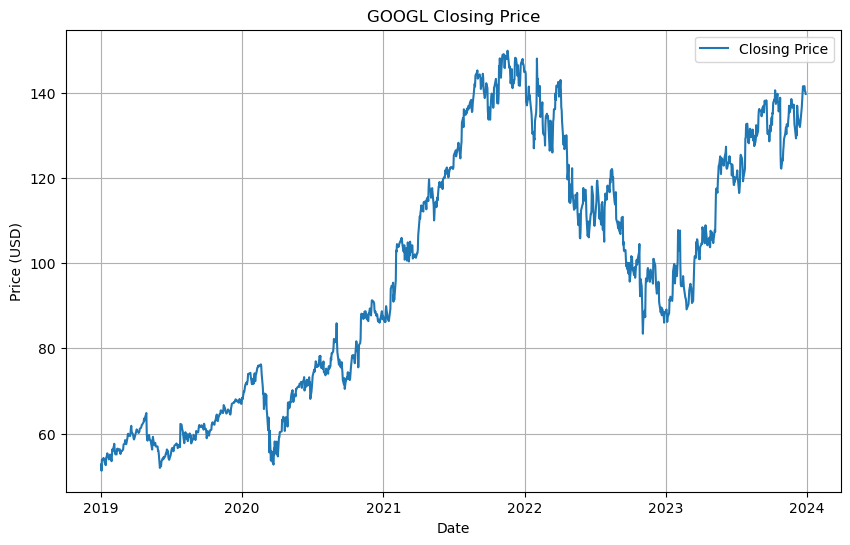

In [33]:
# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Closing Price')
plt.title('GOOGL Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


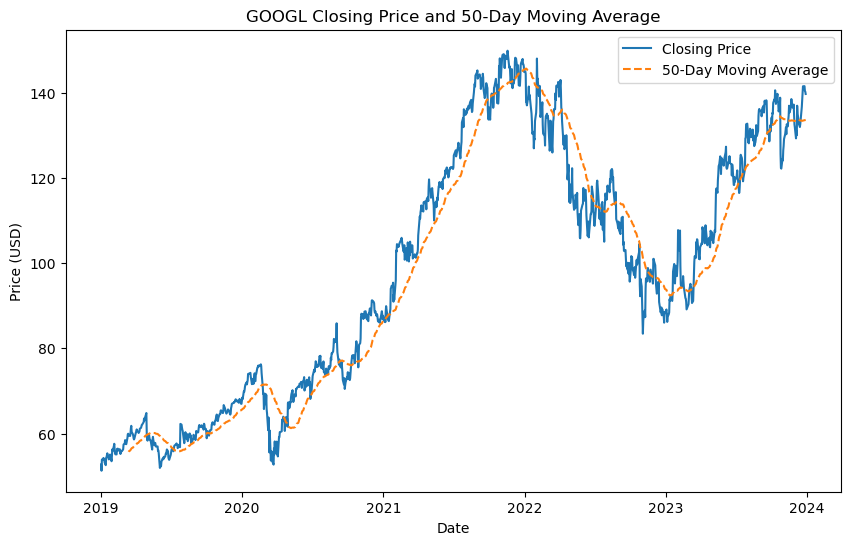

In [35]:
# Calculate the 50-day moving average
data['50_MA'] = data['Close'].rolling(window=50).mean() # this here calculates the 50 day rolling window.
# Its also why it has that lag

# Plot the closing price and the 50-day moving average
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['50_MA'], label='50-Day Moving Average', linestyle='--')
plt.title('GOOGL Closing Price and 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()




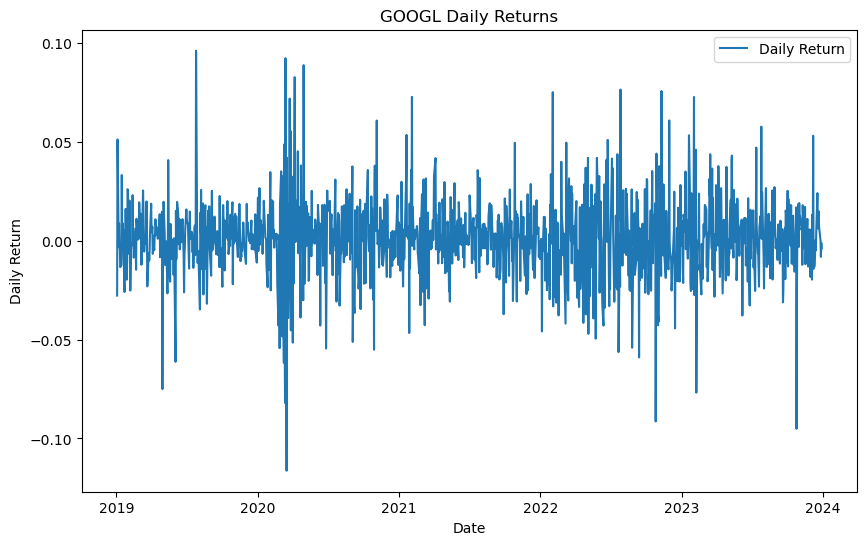

In [40]:
# Now lets plot daily returns

# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()


# Plot the daily returns
plt.figure(figsize=(10, 6))
plt.plot(data['Daily_Return'], label='Daily Return')
plt.title('GOOGL Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()
